In [1]:
import gym
import random

# Frame list collector
frames = []
STEPS = 300

# code for the two only actions in Pong
UP_ACTION = 2
DOWN_ACTION = 3

# initializing our environment
env = gym.make("Pong-v0")

# beginning of an episode
observation = env.reset()

In [21]:
from karpathy import prepro
import numpy as np

prev_input = None

# main loop
for i in range(STEPS):
        
    # choose random action
    action = random.randint(UP_ACTION, DOWN_ACTION)

    #run one step
    observation, reward, done, info = env.step(action)
    # preprocess the observation, set input as difference between images
    cur_input = prepro(observation)
    x = cur_input - prev_input if prev_input is not None else np.zeros(80 * 80)
    prev_input = cur_input

    frames.append(x.reshape(80,80).astype('uint8')) # collecting observation

    # if episode is over, reset to beginning
    if done:
        observation = env.reset()
        frames.append(x.reshape(80,80).astype('uint8')) # collecting observation

MovieWriter imagemagick unavailable. Trying to use pillow instead.


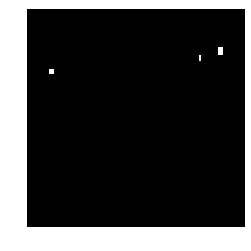

In [22]:
from support import save_frames_as_gif
from matplotlib import animation
from PIL import Image

frames_bis = []
for x in frames:
    frames_bis.append(Image.fromarray(x))

# Save the run
save_frames_as_gif(frames_bis, filename='pong-random-300-steps-black-and-white.gif')